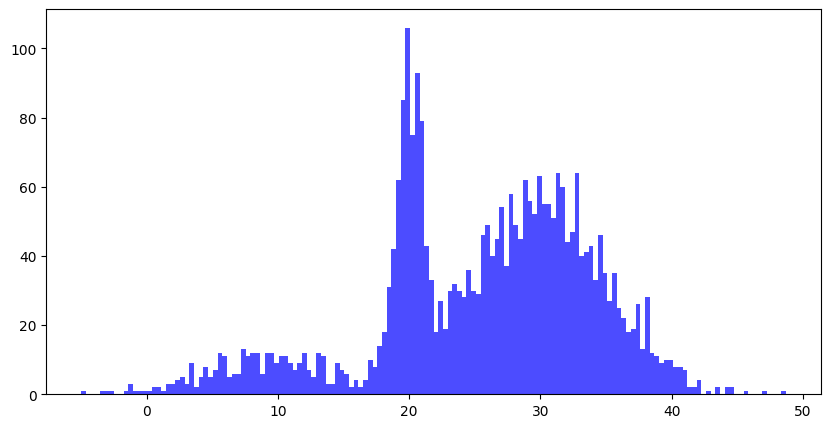

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('formationchannels.npy')

plt.figure(figsize=(10, 5))
plt.hist(data, bins=150, color='blue', alpha=0.7)
plt.show()

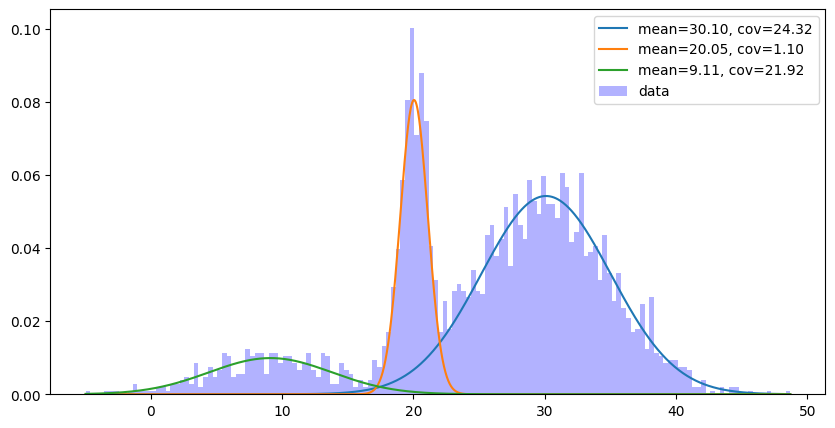

In [3]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data)

# plot data and the three distributions
plt.figure(figsize=(10, 5))
x = np.linspace(np.min(data), np.max(data), 1000)
for i in range(gmm.n_components):
    mean = gmm.means_[i][0]
    cov = gmm.covariances_[i][0][0]
    plt.plot(x, gmm.weights_[i] * norm.pdf(x, mean, np.sqrt(cov)), label=f'mean={mean:.2f}, cov={cov:.2f}')
plt.hist(data, bins=150, density=True, color='blue', alpha=0.3, label='data')

plt.legend()
plt.show()

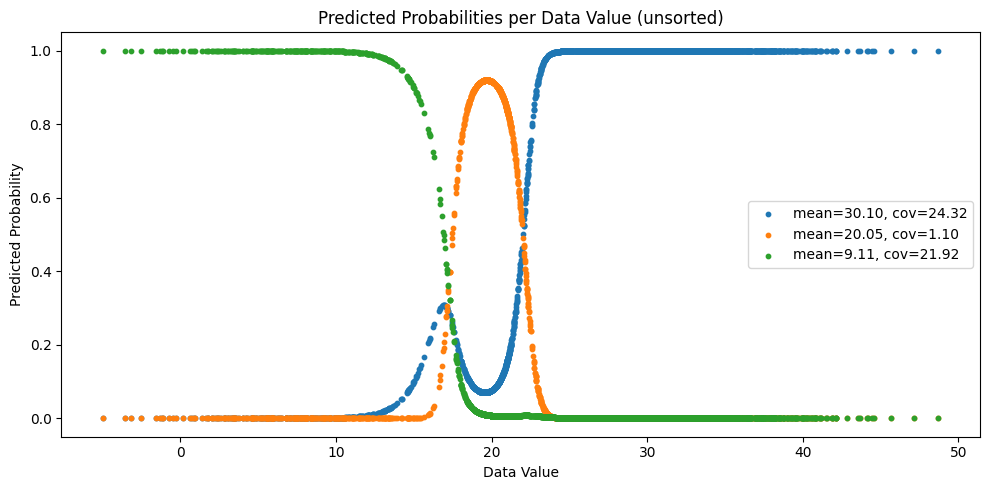

In [4]:
# Compute the predicted probabilities from the fitted GMM model
predict_proba = gmm.predict_proba(data)

# Create custom labels for each component using its mean and covariance.
# For one-dimensional data, the mean is at index [0] and covariance as [0][0].
labels = []
for i in range(gmm.n_components):
    mean_i = gmm.means_[i][0]
    cov_i = gmm.covariances_[i][0][0]
    labels.append(f"mean={mean_i:.2f}, cov={cov_i:.2f}")

plt.figure(figsize=(10, 5))
plt.scatter(data.ravel(), predict_proba[:, 0], label=labels[0], s=10, color='C0')
plt.scatter(data.ravel(), predict_proba[:, 1], label=labels[1], s=10, color='C1')
plt.scatter(data.ravel(), predict_proba[:, 2], label=labels[2], s=10, color='C2')

plt.xlabel("Data Value")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities per Data Value (unsorted)")
plt.legend()
plt.tight_layout()
plt.show()

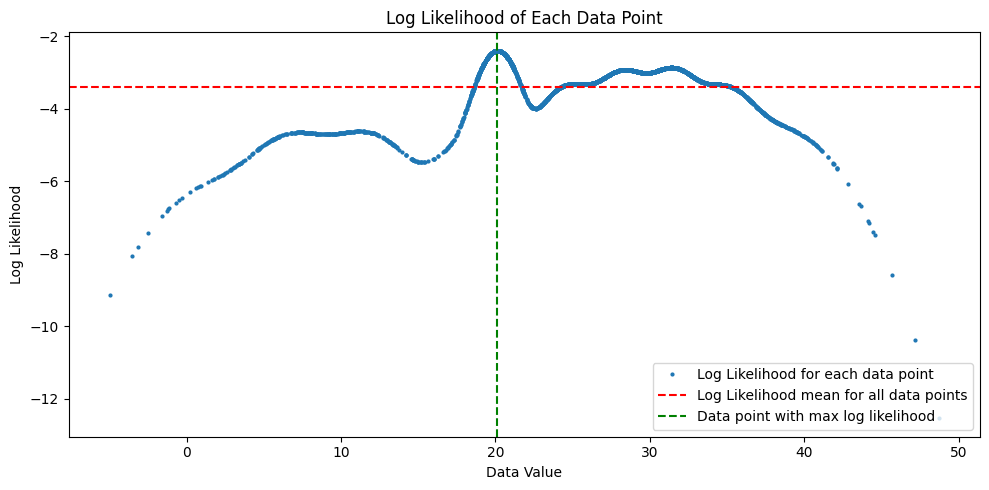

In [19]:
log_likelihood = gmm.score(data)
log_likelihoods = gmm.score_samples(data)

argmax_log_likelihood = np.argmax(log_likelihoods)

plt.figure(figsize=(10, 5))
plt.plot(data, log_likelihoods, 'o', markersize=2, label='Log Likelihood for each data point')
plt.axhline(log_likelihood, color='red', linestyle='--', label='Log Likelihood mean for all data points')
plt.axvline(data[argmax_log_likelihood], color='green', linestyle='--', label='Data point with max log likelihood')
plt.xlabel("Data Value")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood of Each Data Point")
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

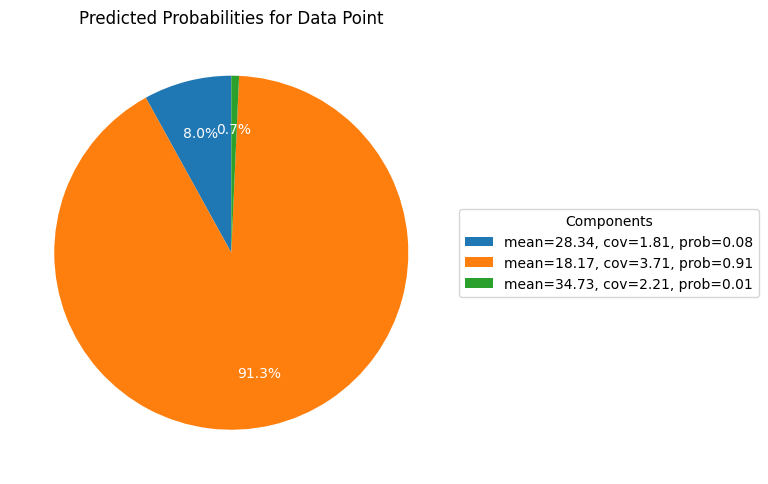

In [36]:
from matplotlib import cm

# Create a pie chart (cake graph) for the predicted probabilities with adjusted distances
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    predict_proba[argmax_log_likelihood],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.7,       # position the percentage texts inside the pie
    labeldistance=1.1,      # position the labels slightly outside
    colors=cm.tab10.colors[:len(labels)]
)

# Adjust the shared text properties
plt.setp(autotexts, size=10, color="white")

# Remove overlapping labels by putting them in a legend instead of on the chart
ax.legend(wedges, labels, title="Components", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Predicted Probabilities for Data Point")

plt.tight_layout()
plt.show()

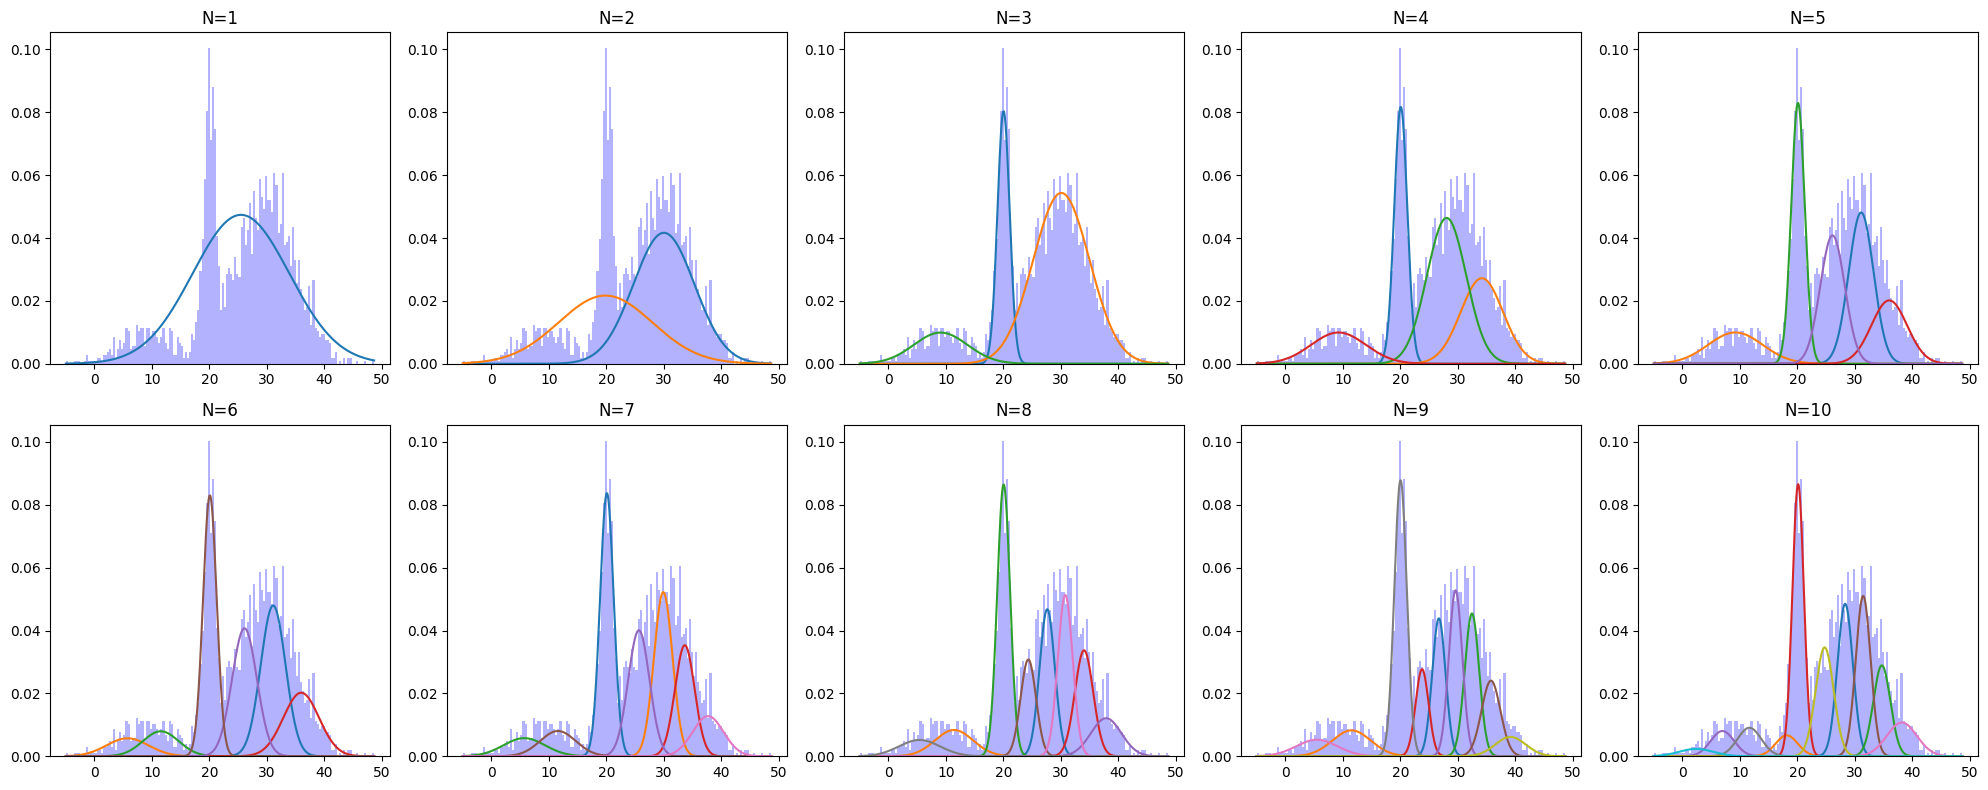

In [6]:
gmms = []
for n in range(1, 11):
    gmm = GaussianMixture(n_components=n, covariance_type='full')
    gmm.fit(data)
    gmms.append(gmm)

# plot all the GMMS in 10 subplots in 1 figure
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, gmm in enumerate(gmms):
    ax = axs[i // 5, i % 5]
    x = np.linspace(np.min(data), np.max(data), 1000)
    for j in range(gmm.n_components):
        mean = gmm.means_[j][0]
        cov = gmm.covariances_[j][0][0]
        ax.plot(x, gmm.weights_[j] * norm.pdf(x, mean, np.sqrt(cov)), label=f'mean={mean:.2f}, cov={cov:.2f}')
    ax.hist(data, bins=150, density=True, color='blue', alpha=0.3, label='data')
    ax.set_title(f'N={gmm.n_components}')
    # ax.legend()
plt.tight_layout()
plt.show()

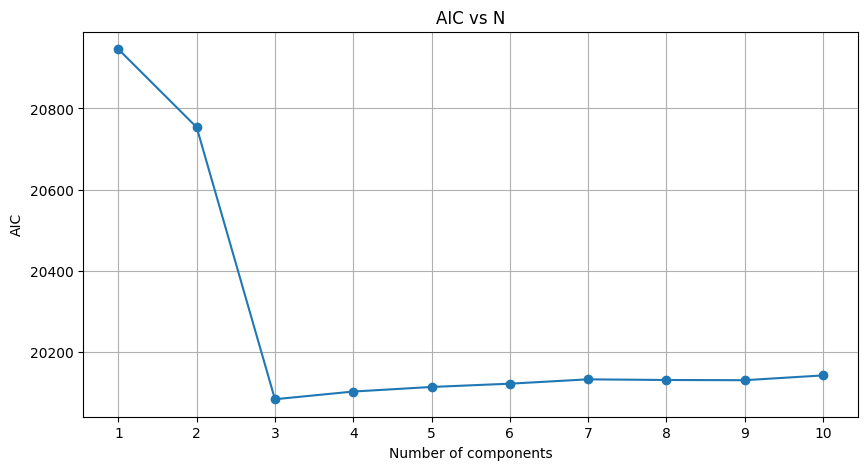

In [7]:
# Compute and plot AIC vs N
aic = []
for gmm in gmms:
    aic.append(gmm.aic(data))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), aic, marker='o')
plt.title('AIC vs N')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.xticks(range(1, 11))
plt.grid()
plt.show()
